# Сокращение размерности

В каждом из заданий:
* Обучите два классификатора (svm и огистическую регрессию на датасете данном ниже) в датасете размерность из 30 признаков
* Попребирайте различное количество итоговых размерностей и постройте графики качества от количества размерностей. Выведите обе модели на одном графике в каждой заадче

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import datasets
from sklearn import svm
from sklearn.linear_model import LogisticRegression
np.random.seed(5)
dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target

# Forward selection (2pts)

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [193]:
from sklearn.svm import SVC

X_upd = np.zeros((569, 0))

accs_svm = np.zeros(30)
ost = np.arange(X.shape[1])

for i in range(30):
    accs = np.zeros((len(ost), 2))
    acc_max = 0
    j_max = 0
    for j in range(len(ost)):
        cur = ost[j]
        X_upd = np.column_stack((X_upd, X[:, cur]))
        X_train, X_test, y_train, y_test = train_test_split(X_upd, y, test_size=0.4, random_state=2020)
        svm=SVC(kernel='linear') 
        svm.fit(X_train, y_train)
        y_pred=svm.predict(X_test)
        acc_cur = accuracy_score(y_test, y_pred)
        if acc_cur > acc_max:
            acc_max = acc_cur
            j_max = j
        X_upd = np.delete(X_upd, i, axis = 1)
    X_upd = np.column_stack((X_upd, X[:, ost[j_max]]))
    ost = np.delete(ost, j_max)
    
    X_train, X_test, y_train, y_test = train_test_split(X_upd, y, test_size=0.4, random_state=2020)
    svm = SVC(kernel='linear') 
    svm.fit(X_train, y_train)
    y_pred=svm.predict(X_test)
    accs_svm[i] = accuracy_score(y_test, y_pred)
    

In [197]:
from sklearn.linear_model import LogisticRegression

X_upd = np.zeros((569, 0))

accs_log = np.zeros(30)
ost = np.arange(X.shape[1])

for i in range(30):
    accs = np.zeros((len(ost), 2))
    acc_max = 0
    j_max = 0
    for j in range(len(ost)):
        cur = ost[j]
        X_upd = np.column_stack((X_upd, X[:, cur]))
        X_train, X_test, y_train, y_test = train_test_split(X_upd, y, test_size=0.4, random_state=2020)
        log_regression = LogisticRegression(max_iter=10000)
        log_regression.fit(X_train, y_train)
        y_pred = log_regression.predict(X_test)
        acc_cur = accuracy_score(y_test, y_pred)
        if acc_cur > acc_max:
            acc_max = acc_cur
            j_max = j
        X_upd = np.delete(X_upd, i, axis = 1)
    X_upd = np.column_stack((X_upd, X[:, ost[j_max]]))
    ost = np.delete(ost, j_max)
    
    X_train, X_test, y_train, y_test = train_test_split(X_upd, y, test_size=0.4, random_state=2020)
    log_regression = LogisticRegression()
    log_regression.fit(X_train, y_train)
    y_pred = log_regression.predict(X_test)
    accs_log[i] = accuracy_score(y_test, y_pred)

C:\Users\mzedg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mzedg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

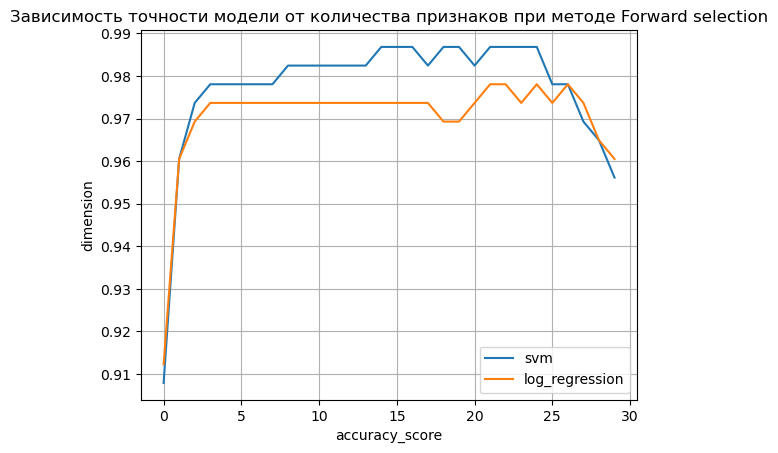

In [196]:
plt.plot(accs_svm, label='svm')
plt.plot(accs_log, label='log_regression')
plt.title('Зависимость точности модели от количества признаков при методе Forward selection')
plt.grid()
plt.xlabel('accuracy_score')
plt.ylabel('dimension')
plt.legend()
plt.show()
    

# Backward elimination (2pts)

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [169]:
from sklearn.svm import SVC

X_train0, X_test0, y_train0, y_test0 = train_test_split(X_upd, y, test_size=0.4, random_state=2020)
X_train = X_train0
X_test = X_test0
accs_svm = np.zeros(30)
for i in range(30):
    svm = SVC(kernel='linear') 
    svm.fit(X_train, y_train)
    y_pred=svm.predict(X_test)
    accs_svm[i] = accuracy_score(y_test, y_pred)
    coefs = svm.coef_[0]
    imin = coefs.argmin()
    X_train = np.delete(X_train, imin, axis=1)
    X_test = np.delete(X_test, imin, axis=1)

In [187]:
from sklearn.linear_model import LogisticRegression

X_train0, X_test0, y_train0, y_test0 = train_test_split(X_upd, y, test_size=0.4, random_state=2020)
X_train = X_train0
X_test = X_test0
accs_log = np.zeros(30)
for i in range(30):
    log_regression = LogisticRegression(max_iter=10000)
    log_regression.fit(X_train, y_train)
    y_pred = log_regression.predict(X_test)
    accs_log[i] = accuracy_score(y_test, y_pred)
    coefs = log_regression.coef_[0]
    imin = coefs.argmin()
    X_train = np.delete(X_train, imin, axis=1)
    X_test = np.delete(X_test, imin, axis=1)

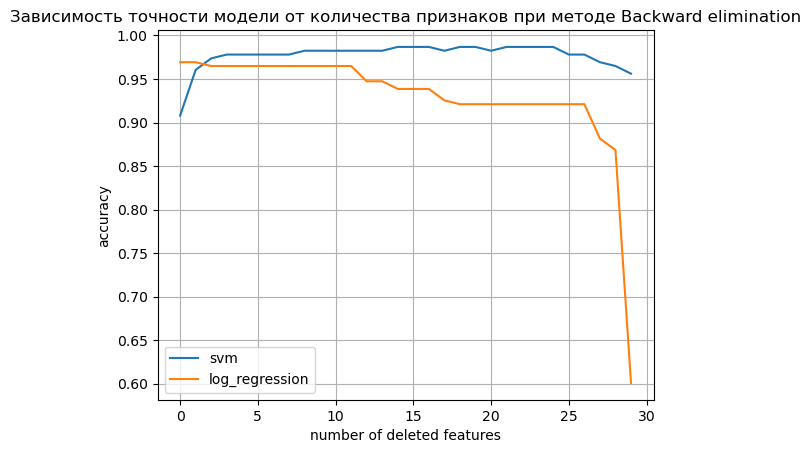

In [188]:
plt.plot(accs_svm, label='svm')
plt.plot(accs_log, label='log_regression')
plt.title('Зависимость точности модели от количества признаков при методе Backward elimination')
plt.grid()
plt.xlabel('number of deleted features')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# PCA (2 pts)


### EM алгоритм

Оставлю это тут просто чтобы пугать людей


$$
\log p(x|\theta) = \int q(z)\log p(x|\theta)dz = \int q(z)\log\dfrac{p(x,z|\theta)}{p(z|x,\theta)}dz = \int q(z)\log\dfrac{p(x,z|\theta)}{q(z)}dz+\int q(z)\log\dfrac{q(z)}{p(z|x,\theta)}dz = \mathcal{L}(q,\theta)+KL(q(z)|p(z|x,\theta))
$$

** E-step **
$$ q(z)^{(n+1)} = p(z|x,\theta^{(n)}) $$
** M-step **
$$ \theta^{(n+1)} = \max\limits_{\theta} \mathcal{L}(q^{(n+1)},\theta) $$

Обучите два классификатора (svm и огистическую регрессию на датасете данном ниже) в датасете размерность из 30 признаков. Попребирайте различное количество итоговых размерностей (до которых будет сокращать PCA) и постройте графики для обоих классификаторов. Сделайте выводы.

In [189]:
from sklearn.svm import SVC

accs_svm = np.zeros(30)

for i in range(1, 31):
    pca = decomposition.PCA(n_components = i)
    pca.fit(X)
    X_upd = pca.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_upd, y, test_size=0.4, random_state=2020)
    svm = SVC(kernel='linear') 
    svm.fit(X_train, y_train)
    y_pred=svm.predict(X_test)
    accs_svm[i - 1] = accuracy_score(y_test, y_pred)
    coefs = svm.coef_[0]
    imin = coefs.argmin()
    X_upd = np.delete(X_upd, imin, axis=1)

In [190]:
from sklearn.linear_model import LogisticRegression

accs_log = np.zeros(30)
for i in range(1, 31):
    pca = decomposition.PCA(n_components = i)
    pca.fit(X)
    X_upd = pca.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_upd, y, test_size=0.4, random_state=2020)
    log_regression = LogisticRegression(max_iter = 500)
    log_regression.fit(X_train, y_train)
    y_pred = log_regression.predict(X_test)
    accs_log[i - 1] = accuracy_score(y_test, y_pred)
    coefs = log_regression.coef_[0]
    imin = coefs.argmin()
    X_upd = np.delete(X_upd, imin, axis=1)

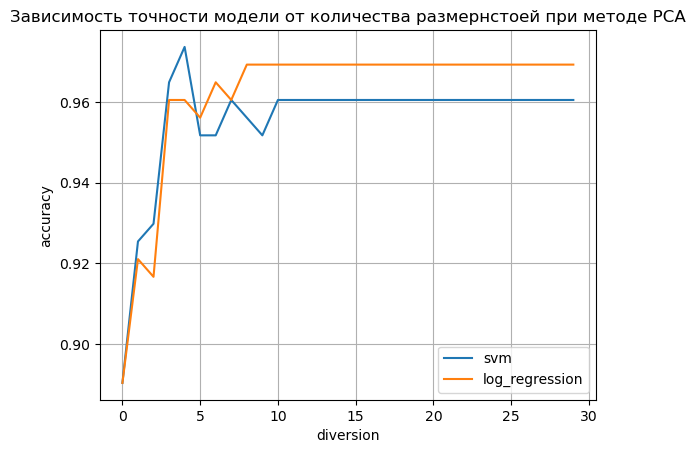

In [192]:
plt.plot(accs_svm, label='svm')
plt.plot(accs_log, label='log_regression')
plt.title('Зависимость точности модели от количества размернстоей при методе PCA')
plt.grid()
plt.xlabel('diversion')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#  Выводы (1pts)

По полученным графикам видно, что:
1) Точность данной модели при использовании метода уменьшения размерности Forward selection сначала увеличивается с увеличнением количества признаков, но в последние несколько шагов уменьшается.
2) При использовании метода Backward elimination значение точности достигает незначительно меняется и достигает своего пика ближе через первые несколько шагов, а затем снижается.
3) При методе PCA точность резко возрастает за первые несколько шагов алгоритма, а далее изменяется незначительно.

